<a href="https://colab.research.google.com/github/MelYoungers/whatsmyshape/blob/main/DeepLearning_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective: Predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import libraries, first Data Handling and Manipulation.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Deep Learning Frameworks

In [3]:
import tensorflow as tf
from tensorflow import keras
import torch
import torchvision

Computer Vision, Image Processing

In [4]:
import cv2
from PIL import Image



Model Evaluation and Metrics

In [5]:
from sklearn import metrics


Data Pre-Processing

In [6]:
from skimage import transform, filters, util

Now I'm going to exclude warnings

In [7]:
import warnings

warnings.filterwarnings("ignore")

Checking the version of Tensorflow

In [8]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


Load the Dataset, then split it into train and test sets.

In [9]:
import h5py

In [10]:
!pip install scikit-learn

In [11]:
from sklearn.model_selection import train_test_split

In [17]:
file_path = '/content/SVHN_single_grey.h5'


In [23]:
from h5py._hl.files import h5f
with h5py.File(file_path, 'r') as hdf:
  X_train = hdf['X_train'][:]
  y_train = hdf['y_train'][:]
  X_test = hdf['X_test'][:]
  y_test = hdf['y_test'][:]

  hdf.close()

  print("Success") if True else None

Success


Checking number of images in the training and testing dataset.

In [26]:
print(" Number images in Training dataset", X_train.shape[0])
print("Number images in Testing dataset", X_test.shape[0])

 Number images in Training dataset 42000
Number images in Testing dataset 18000


Now lets visualize the data.

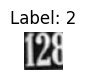

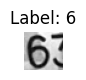

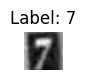

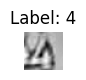

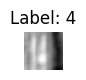

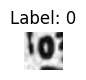

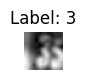

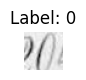

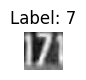

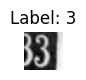

In [28]:
for i in range(10):
  plt.figure(figsize=(.5, .5))
  plt.imshow(X_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off') # hides axis tick marks in plot, makes for cleaner display.
  plt.show()

We can see the labels seem to correspond with the clearest or most well-formed respective image.

DATA PRE-PROCESSING

Shape and array of pixels for first image

In [29]:
first_image = X_train[0]
print("Shape of the first image:", first_image.shape)
print("Array of pixels for the first image:")
print(first_image)

Shape of the first image: (32, 32)
Array of pixels for the first image:
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In this image 113 and the higher numbers likely represent the white part, or brightness level of the image.

The data is 2D, I'm going to flatten it to a 1D array of pixel values

In [32]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

Now Normalize the sets by dividing by 255.

In [33]:
X_train_normalized = X_train_flattened / 255
X_test_normalized = X_test_flattened / 255

Now print shape of training and test data.

In [34]:
#Training set
print("Shape of X_train normalized:", X_train_normalized.shape)
print("Shape of y_train:", y_train.shape)
#Test set
print("Shape of X_test_normalized:", X_test_normalized.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train normalized: (42000, 1024)
Shape of y_train: (42000,)
Shape of X_test_normalized: (18000, 1024)
Shape of y_test: (18000,)


One-hot encode the target variable

In [35]:
from keras.utils import np_utils

In [36]:
y_train_encoded = np_utils.to_categorical(y_train)
y_test_encoded = np_utils.to_categorical(y_test)

In [38]:
y_test_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

MODEL BUILDING

Fix the seed for random number generators (essentially make the model reproducable)

In [39]:
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

Build the model

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [43]:
#We need to define the function 'nn_model_1'

def nn_model_1(num_classes):
  model = Sequential([
      Dense(64, activation='relu', input_shape=(1024, )),
      Dense(32, activation='relu'),
      Dense(num_classes, activation='softmax')
  ])

  model.compile(loss='categorical_crossentropy', #common for multi-class classification problems
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])
  return model

In [46]:
#call the nn_model_1 function and store model in new variable
num_classes = 10

model1 = nn_model_1(num_classes)


In [47]:
#now print model summary

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


This is the summary of the model architecture, including the number of parameters in each layer (65600, 2080, 330) and the total number of parameters in the model (68010)

Fit on training data

In [49]:
history = model1.fit(X_train_normalized, y_train_encoded, validation_split=0.2, batch_size=128, epochs=20, verbose=1) #20% of training data will be used for validation during training.

#model will be updated after every 128 samples
#the dataset will be passed through the model 20 times
#'hisotry' contains information about the training process

Epoch 1/20
263/263 [==============================] - 2s 4ms/step - loss: 2.3053 - accuracy: 0.1019 - val_loss: 2.2891 - val_accuracy: 0.1037
Epoch 2/20
263/263 [==============================] - 1s 4ms/step - loss: 2.2627 - accuracy: 0.1303 - val_loss: 2.2337 - val_accuracy: 0.1611
Epoch 3/20
263/263 [==============================] - 1s 4ms/step - loss: 2.1927 - accuracy: 0.1614 - val_loss: 2.1387 - val_accuracy: 0.1681
Epoch 4/20
263/263 [==============================] - 1s 5ms/step - loss: 2.1314 - accuracy: 0.1743 - val_loss: 2.1073 - val_accuracy: 0.1715
Epoch 5/20
263/263 [==============================] - 1s 5ms/step - loss: 2.1110 - accuracy: 0.1771 - val_loss: 2.1041 - val_accuracy: 0.1771
Epoch 6/20
263/263 [==============================] - 1s 5ms/step - loss: 2.1048 - accuracy: 0.1784 - val_loss: 2.1192 - val_accuracy: 0.1690
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 2.1001 - accuracy: 0.1801 - val_loss: 2.1000 - val_accuracy: 0.1829
Epoch 

The very last test had some of the lowest losses and highest accuracies. The model was presumably learning. That being said an 18-19 percent accuracy, is very poor.

Now I'm going to plot the training and validation accuracies to get a better understanding of the model's performance.

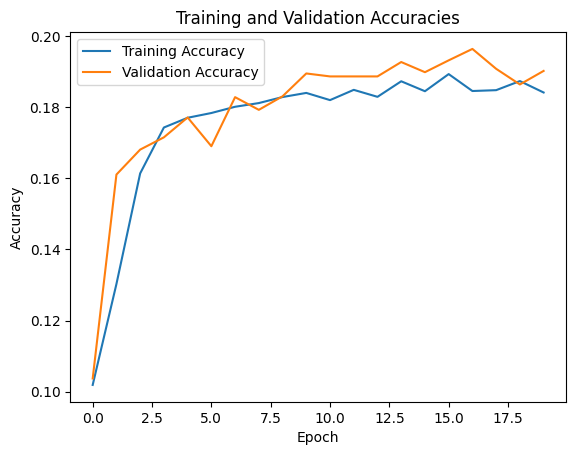

In [51]:
plt.plot(history.history['accuracy'], label='Training Accuracy') #labeling makes for clean visuals
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracies')
plt.show()


Observations: The training accuracy and validation accuracy both increase and stay relatively close to each other, it suggests that the model is learning effectively, and there is no significant overfitting.

2ND MODEL: Im going to build another model with higher complexities in hopes to improve the performance of the model.

In [57]:
#First we need to clear the history of the first model from the Keras backend
from keras import backend as K

K.clear_session()

In [59]:
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)


Now I'm ready to begin building the second model.